In [1]:
from collections import namedtuple
import json

import numpy as np
import pandas as pd
import seaborn as sb

from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
sb.set(rc={'figure.figsize':(20,15)}, style="darkgrid")

In [3]:
hparm = namedtuple("hparm", ["lr", "update_rate", "batch_size", "memory_size", "gamma", "tau", "times"])

path_prefix = "./hp_search_results/"

search_reference = { 
    1:  [hparm(5e-4, 4,  64,  int(1e5), 0.99, 1e-3, 10 ), "set1_results.json" ],
    2:  [hparm(5e-3, 4,  64,  int(1e5), 0.99, 1e-3, 10 ), "set2_results.json" ],
    3:  [hparm(5e-2, 4,  64,  int(1e5), 0.99, 1e-3, 10 ), "set3_results.json" ],
    4:  [hparm(5e-4, 8,  64,  int(1e5), 0.99, 1e-3, 10 ), "set4_results.json" ],
    5:  [hparm(5e-4, 16, 64,  int(1e5), 0.99, 1e-3, 10 ), "set5_results.json" ],
    6:  [hparm(5e-4, 4,  64,  int(1e5), 0.99, 1e-2, 10 ), "set6_results.json" ],
    7:  [hparm(5e-4, 4,  64,  int(1e5), 0.99, 5e-2, 10 ), "set7_results.json" ],
    8:  [hparm(5e-5, 4,  64,  int(1e5), 0.99, 1e-3, 10 ), "set8_results.json" ],
    9:  [hparm(5e-4, 4,  64,  int(1e4), 0.99, 1e-3, 10 ), "set9_results.json" ],
    10: [hparm(5e-4, 4,  64,  int(1e3), 0.99, 1e-3, 10 ), "set10_results.json"],
    11: [hparm(5e-4, 4,  32,  int(1e5), 0.99, 1e-3, 10 ), "set11_results.json"],
    12: [hparm(5e-4, 4,  16,  int(1e5), 0.99, 1e-3, 10 ), "set12_results.json"],
    13: [hparm(5e-4, 4,  128, int(1e5), 0.99, 1e-3, 10 ), "set13_results.json"],
    14: [hparm(5e-4, 8,  64,  int(1e5), 0.99, 1e-3, 10 ), "set14_results.json"],
    15: [hparm(5e-4, 4,  64,  int(1e5), 0.99, 1e-3, 100), "set15_results.json"],
    16: [hparm(5e-6, 4,  64,  int(1e5), 0.99, 1e-3, 100), "set16_results.json"]
}

In [6]:
experiments = {
    "learning_rate_change": ([search_reference[x] for x in [1,2,3,8]], "lr"),
    "update_rate_change": ([search_reference[x] for x in [1,4,5]], "update_rate"),
    "tau_change": ([search_reference[x] for x in [1,6,7]], "tau"),
    "memory_size_change": ([search_reference[x] for x in [1,9,10]], "memory_size"),
    "batch_size_change": ([search_reference[x] for x in [1,11,12,13]], "batch_size")
#    "normality_estimation": ([search_reference[x] for x in [15, 16]], "times")
}

In [7]:
experiment_outcomes = []
for experiment in experiments:
    (experiment_hparm, var_under_test) = experiments[experiment]
    experiment_data = [[par, pd.read_json(path_prefix + filename)] for (par, filename) in experiment_hparm]
    
    for exp_item in experiment_data:
        df = exp_item[1].T
        df["step"] = df.index
        df = df.melt(id_vars = ["step"], var_name="run_id", value_name="score")
        df["run_id"] = df["run_id"].astype(str).astype("int64")
        df[var_under_test] = exp_item[0]._asdict()[var_under_test]
        ma_score = df.groupby('run_id')['score'].rolling(window = 100).mean().reset_index().fillna(0)
        ma_score.columns = ["run_id", "step", "ma_score"]
        exp_item[1] = pd.merge(df, ma_score, how="inner", left_on=["run_id", "step"], right_on=["run_id", "step"])

    experiment_df = pd.concat([x[1] for x in experiment_data])
    experiment_outcomes.append((experiment, experiment_df, var_under_test))

In [20]:
def render_experiment_results(results):
    plt = sb.lineplot(
        data = results[1], 
        x = 'step', 
        y = 'ma_score', 
        hue = results[2], 
        ci = 0.9, 
        legend = "full", 
        hue_norm = LogNorm(), 
        palette = "Paired"
    )
    plt.set_title(results[0])


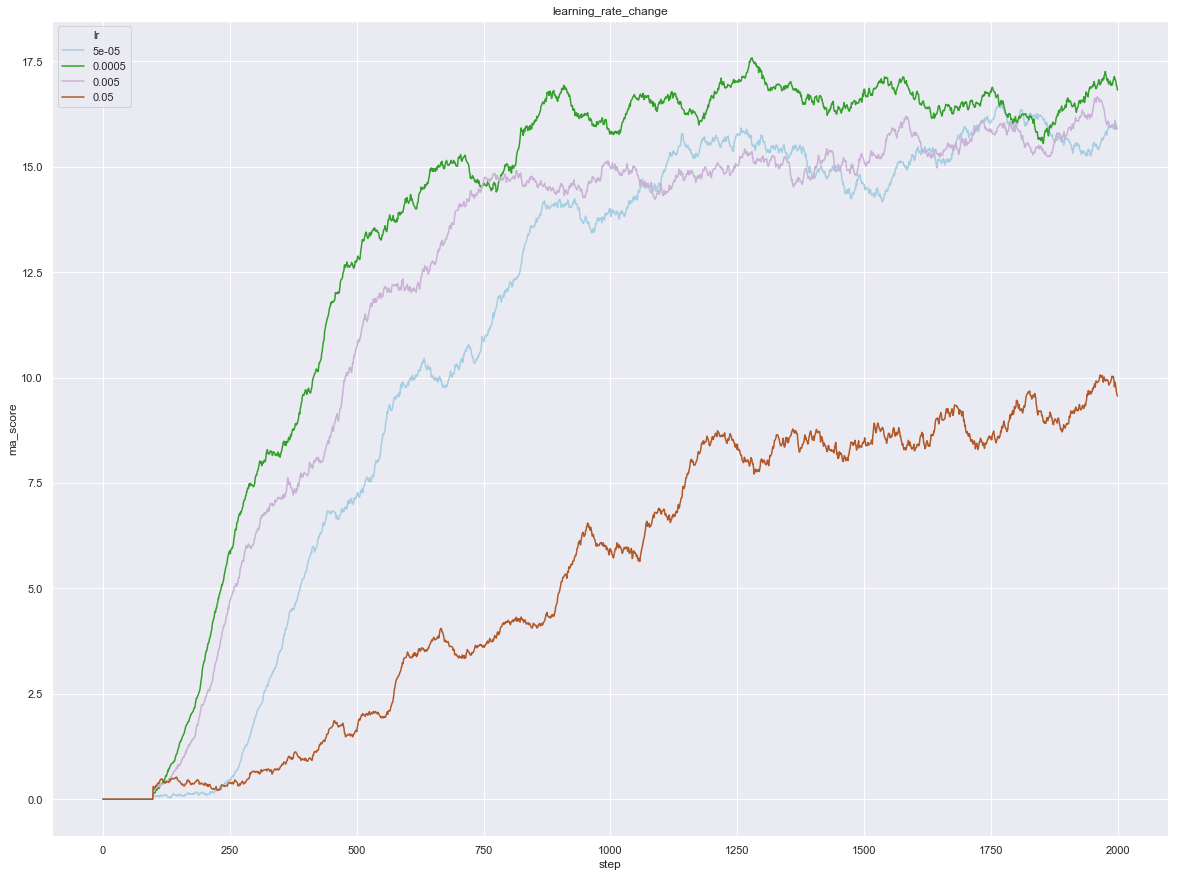

In [21]:
render_experiment_results(experiment_outcomes[0])

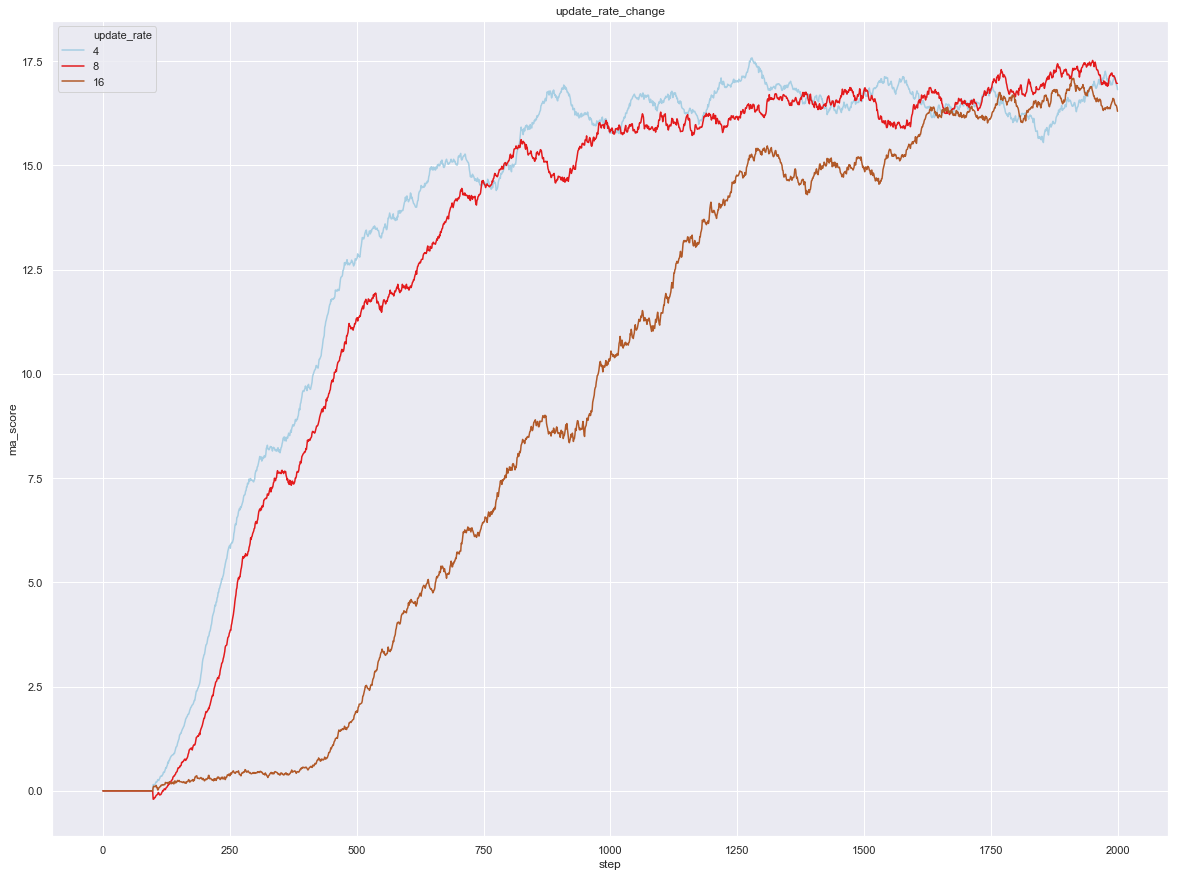

In [22]:
render_experiment_results(experiment_outcomes[1])

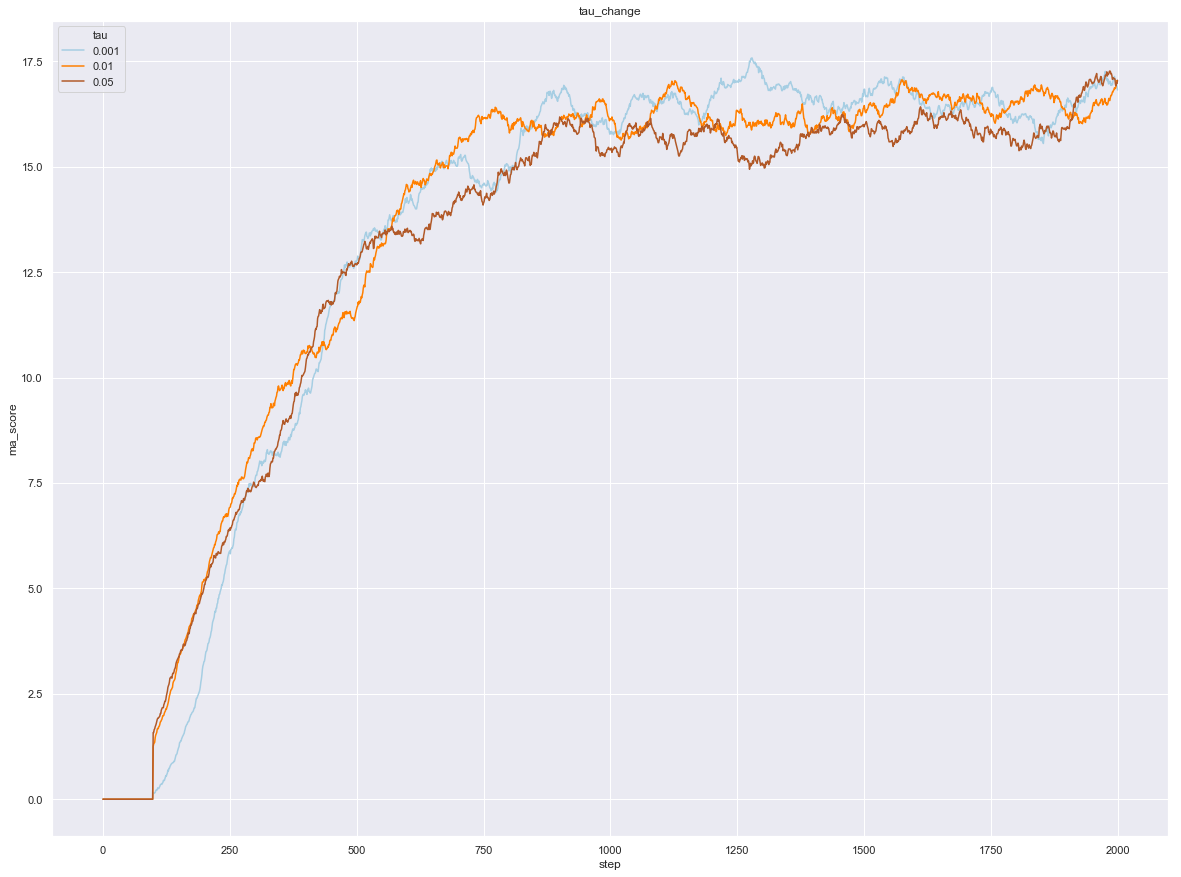

In [23]:
render_experiment_results(experiment_outcomes[2])

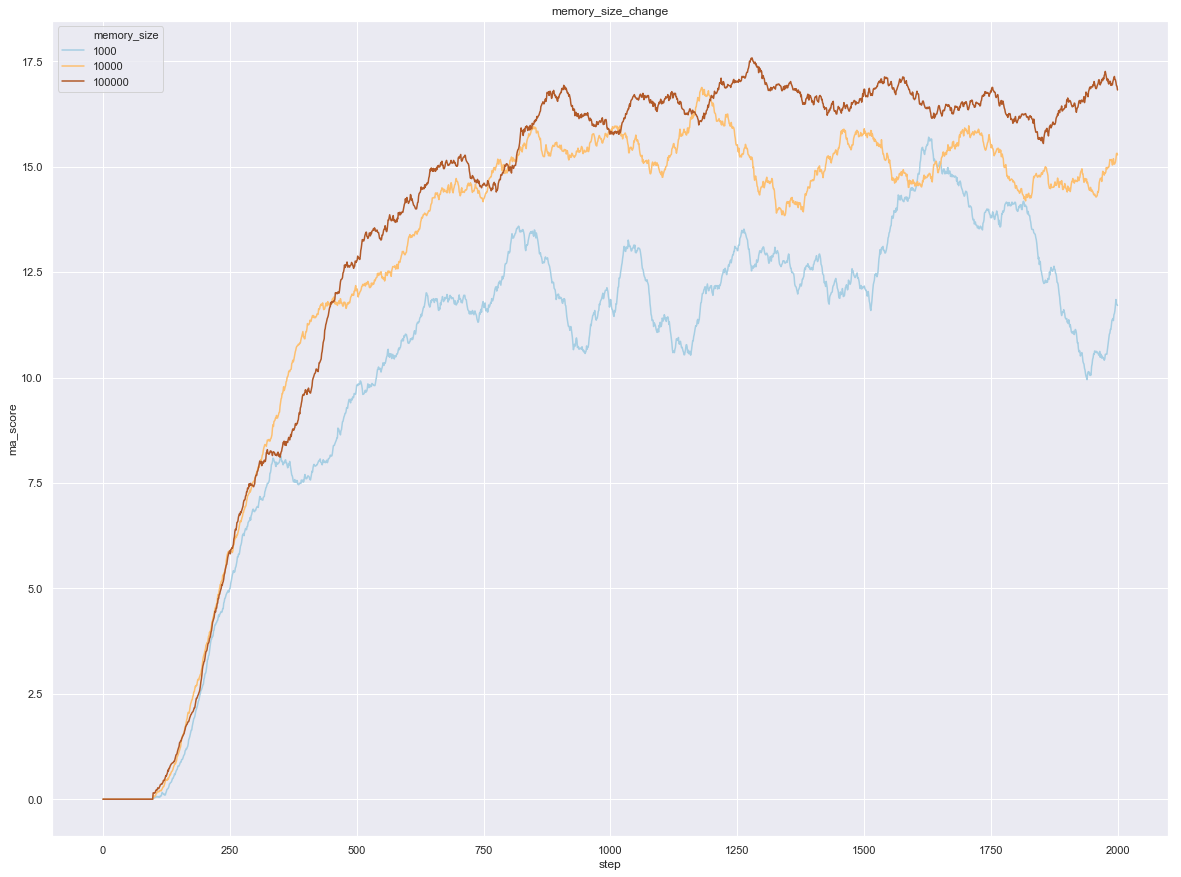

In [24]:
render_experiment_results(experiment_outcomes[3])

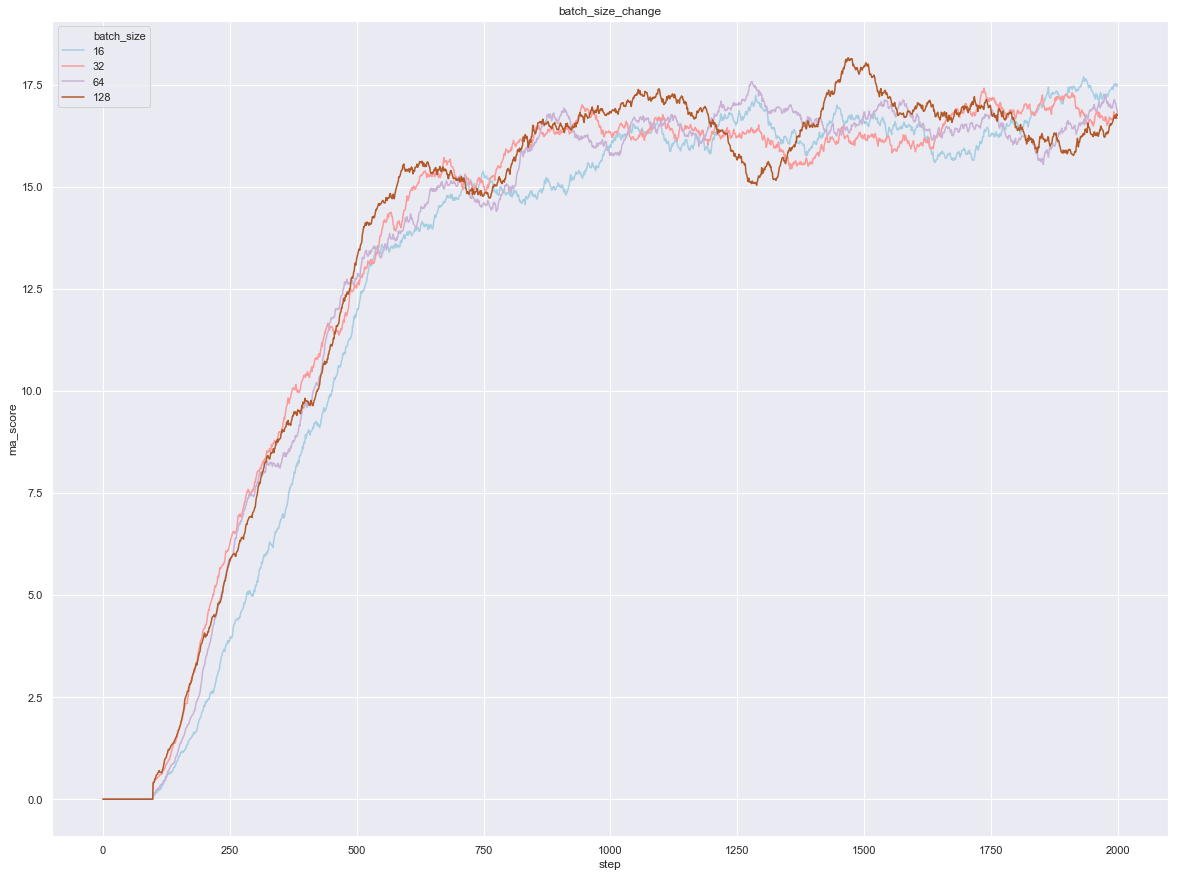

In [25]:
render_experiment_results(experiment_outcomes[4])